DB Index: 1.192100754637279
Number of clusters formed: 4


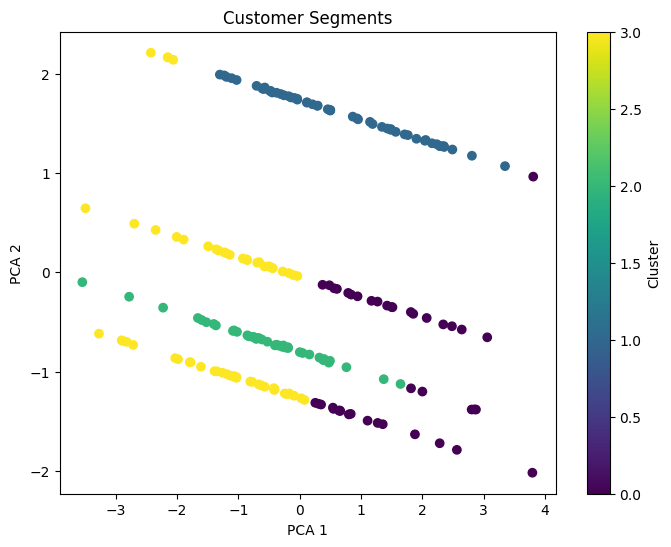

Cluster Centers:
 [[ 1.1301466   0.50379674  1.13526927  0.35391521 -0.26592898 -0.59704218]
 [ 0.23210085  0.1691598   0.17375213 -0.57928445 -0.54831888  1.54041597]
 [-0.31561505 -0.165984   -0.23731406 -0.57928445  1.82375628 -0.6491753 ]
 [-0.75902235 -0.37885079 -0.76345238  0.64786425 -0.54831888 -0.50791135]]


In [4]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Step 1: Load data
customers = pd.read_csv('Customers.csv')  # Update path if necessary
transactions = pd.read_csv('Transactions.csv')  # Update path if necessary

# Step 2: Calculate aggregate values from the transactions data
# Total Spent: Sum of TotalValue for each customer
total_spent = transactions.groupby('CustomerID')['TotalValue'].sum().reset_index()
total_spent.rename(columns={'TotalValue': 'total_spent'}, inplace=True)

# Average Quantity: Mean of Quantity for each customer
avg_quantity = transactions.groupby('CustomerID')['Quantity'].mean().reset_index()
avg_quantity.rename(columns={'Quantity': 'avg_quantity'}, inplace=True)

# Total Products: Sum of Quantity for each customer
total_products = transactions.groupby('CustomerID')['Quantity'].sum().reset_index()
total_products.rename(columns={'Quantity': 'total_products'}, inplace=True)

# Step 3: Merge all data (customers, total_spent, avg_quantity, and total_products)
merged_data = customers.merge(total_spent, on='CustomerID', how='inner')
merged_data = merged_data.merge(avg_quantity, on='CustomerID', how='inner')
merged_data = merged_data.merge(total_products, on='CustomerID', how='inner')

# Step 4: Handle categorical data (one-hot encoding for 'Region')
merged_data = pd.get_dummies(merged_data, columns=['Region'], drop_first=True)

# Step 5: Select relevant features (including one-hot encoded 'Region')
features = merged_data[['total_spent', 'avg_quantity', 'total_products'] + [col for col in merged_data.columns if col.startswith('Region_')]]

# Step 6: Scale the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Step 7: Apply KMeans clustering
num_clusters = 4  # Feel free to experiment with different values
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
merged_data['Cluster'] = kmeans.fit_predict(scaled_features)

# Step 8: Calculate clustering metrics (Davies-Bouldin Index)
db_index = davies_bouldin_score(scaled_features, merged_data['Cluster'])
print(f"DB Index: {db_index}")

# Step 9: Visualize clusters using a 2D plot
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)
print(f"Number of clusters formed: {num_clusters_formed}")

plt.figure(figsize=(8, 6))
plt.scatter(pca_features[:, 0], pca_features[:, 1], c=merged_data['Cluster'], cmap='viridis')
plt.title('Customer Segments')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.colorbar(label='Cluster')
plt.show()

# Optional: Check the cluster centers
print("Cluster Centers:\n", kmeans.cluster_centers_)
